#  DOGS vs CATS
##Convolutional Neural Network 

 First Install Theano, Tensorflow & Keras



## PART 1 - Building the CNN

In [0]:
# Import the Keras libraries and packages
from keras.models import Sequential        # To initialize an NN as a sequence of layers
from keras.layers import Conv2D            # To use convolution layers (2D images)
from keras.layers import MaxPooling2D      # To use pooling layer
from keras.layers import Flatten           # To convert the the pool feature maps into an input vector
from keras.layers import Dense             # To add the fully connected layers into a classic ANN

In [9]:
 # Initialize the CNN
classifier = Sequential()

In [0]:
# Step 1 - Convolutional layer
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation = 'relu'))   # 32 feature detectors of 3x3 (rowxcol) | images: colored, 64x64

In [0]:
# Step 2 - Pooling to reduce the size of the feature map
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [0]:
# Add a second Convolutional Layer to improve accuracy
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))   
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [0]:
# Step 3 - Flattening to prepare the input layer of a futur ANN (as a vector)
classifier.add(Flatten())   

In [0]:
# Step 4 - Full Connection (classic ANN)
classifier.add(Dense(activation = 'relu', units=128))            # 128 hidden nodes
classifier.add(Dense(activation = 'sigmoid', units=1))           # sigmoid for binary output: cat or dog

In [15]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## PART 2 - Fitting the CNN to the images

In [0]:
# Image Augmentation - preprocess to prevent overfitting
from keras.preprocessing.image import ImageDataGenerator

In [0]:
# Prepare image augmentation
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [0]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
# Import dataset from google drive
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/code/machine_learning/dogs_vs_cats/dataset'  #change dir to your project folder

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [20]:
# Apply image augmentation to the training set and resizing images 
training_set = train_datagen.flow_from_directory(root_path + '/training_set',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

Found 8061 images belonging to 2 classes.


In [21]:
test_set = test_datagen.flow_from_directory(root_path + '/test_set',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 2047 images belonging to 2 classes.


In [0]:
classifier.fit_generator(training_set,
                         steps_per_epoch=250,
                         epochs=25,
                         validation_data=test_set,
                         validation_steps=100
                         )



Epoch 1/25
250/250 [==============================] - 2520s 10s/step - loss: 0.6669 - acc: 0.5849 - val_loss: 0.6398 - val_acc: 0.6136
Epoch 2/25
250/250 [==============================] - 87s 347ms/step - loss: 0.5942 - acc: 0.6805 - val_loss: 0.5401 - val_acc: 0.7339
Epoch 3/25
250/250 [==============================] - 86s 344ms/step - loss: 0.5488 - acc: 0.7189 - val_loss: 0.5291 - val_acc: 0.7427
Epoch 4/25
250/250 [==============================] - 87s 347ms/step - loss: 0.5267 - acc: 0.7342 - val_loss: 0.5410 - val_acc: 0.7376
Epoch 5/25
250/250 [==============================] - 86s 344ms/step - loss: 0.4918 - acc: 0.7568 - val_loss: 0.4880 - val_acc: 0.7718
Epoch 6/25
250/250 [==============================] - 86s 343ms/step - loss: 0.4824 - acc: 0.7674 - val_loss: 0.5337 - val_acc: 0.7448
Epoch 7/25
141/250 [===============>..............] - ETA: 30s - loss: 0.4725 - acc: 0.7686

## Prediction

In [22]:
# PART 3 - Predict
# Step 1 - Save the model to disk
import pickle

from google.colab import drive
drive.mount('/content/gdrive')

# Serialize
with open('gdrive/My Drive/code/machine_learning/dogs_vs_cats/finalized_model.pkl', 'wb') as handle:
    pickle.dump(classifier, handle, pickle.HIGHEST_PROTOCOL)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [23]:
# De-serialize
with open('gdrive/My Drive/code/machine_learning/dogs_vs_cats/finalized_model.pkl', 'rb') as handle:
    model = pickle.load(handle)

model.summary()

# Save model as JSON
# from google.colab import files

# files.download("model.json")
# model.save('weights.h5')
# files.download('weights.h5')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [4]:
# Load model from JSON
# from keras.models import model_from_json

# json_file = open('gdrive/My Drive/code/machine_learning/dogs_vs_cats/model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)

# load weights into new model
# loaded_model.load_weights('gdrive/My Drive/code/machine_learning/dogs_vs_cats/weights.h5')
# loaded_model.summary()

Using TensorFlow backend.











Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)       

In [0]:
# now we can call various methods over mlp_nn as as:    
from PIL import Image
from skimage import transform
import numpy as np

def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (64, 64, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image   

In [25]:
# Define classes
classes = training_set.class_indices  
print(classes)

{'cats': 0, 'dogs': 1}


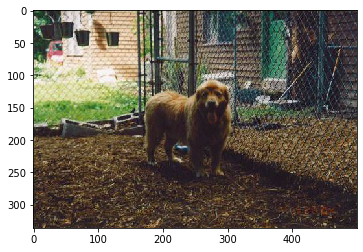

Dog - 52.49999761581421 %


In [39]:
# Select random image
import random
from random import randint

random_set = random.randint(0, 1) # 0 or 1
random_image = random.randint(4001, 5000)

if random_set == 1:
  set = 'dogs'
  image_name = 'dog.'+ str(random_image) +'.jpg'
else:
  set = 'cats'
  image_name = 'cat.'+ str(random_image) +'.jpg' 

image_url = 'gdrive/My Drive/code/machine_learning/dogs_vs_cats/dataset/test_set/'+ set +'/'+ image_name
image = load(image_url)

# predict result
accuracy = model.predict(image)
result = model.predict_classes(image)

if result[0][0] == 1:
    prediction = 'Dog -'
else:
    prediction = 'Cat -'

# Show image
from matplotlib import pyplot as plt

im = Image.open(image_url)
plt.imshow(im)
plt.show()

# Show result
print(prediction, round(accuracy[0][0], 3) * 100, "%")